<a href="https://colab.research.google.com/github/fgokmenoglu/KERAS/blob/main/Keras_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Number of GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

Number of GPUs Available:  0


In [ ]:
os.chdir('C:/Users/fatih.gokmenoglu/Documents/Colab/Data/dogs-vs-cats/train')
if os.path.isdir('train/dog') is False:
  os.makedirs('train/dog')
  os.makedirs('train/cat')
  os.makedirs('valid/dog')
  os.makedirs('valid/cat')
  os.makedirs('test/dog')
  os.makedirs('test/cat')

  for c in random.sample(glob.glob('cat*'), 500):
    shutil.move(c, 'train/cat')
  for c in random.sample(glob.glob('dog*'), 500):
    shutil.move(c, 'train/dog')
  for c in random.sample(glob.glob('cat*'), 100):
    shutil.move(c, 'valid/cat')
  for c in random.sample(glob.glob('dog*'), 100):
    shutil.move(c, 'valid/cat')
  for c in random.sample(glob.glob('cat*'), 50):
    shutil.move(c, 'test/cat')
  for c in random.sample(glob.glob('dog*'), 50):
    shutil.move(c, 'test/dog')

  os.chdir('../../')

In [ ]:
train_path = 'C:/Users/fatih.gokmenoglu/Documents/Colab/Data/dogs-vs-cats/train/train'
valid_path = 'C:/Users/fatih.gokmenoglu/Documents/Colab/Data/dogs-vs-cats/train/valid'
test_path = 'C:/Users/fatih.gokmenoglu/Documents/Colab/Data/dogs-vs-cats/train/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=train_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=valid_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
  .flow_from_directory(directory=test_path, target_size=(224, 224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

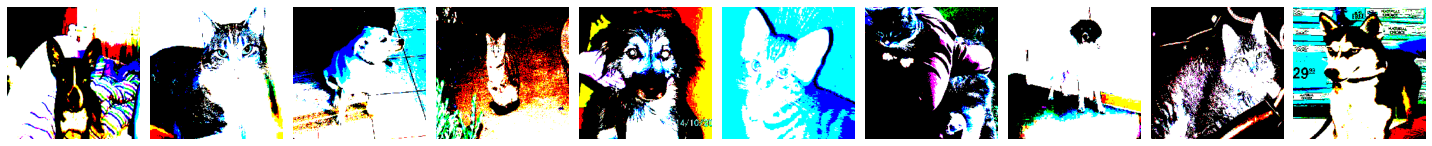

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
plotImages(imgs)
print(labels)

In [ ]:
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=(2, 2), strides=2),
  Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
  MaxPool2D(pool_size=(2, 2), strides=2),
  Flatten(),
  Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 33s - loss: 11.9554 - accuracy: 0.5620 - val_loss: 6.2249 - val_accuracy: 0.5200 - 33s/epoch - 335ms/step
Epoch 2/10
100/100 - 27s - loss: 2.0596 - accuracy: 0.7580 - val_loss: 3.3693 - val_accuracy: 0.7000 - 27s/epoch - 269ms/step
Epoch 3/10
100/100 - 26s - loss: 0.9368 - accuracy: 0.8770 - val_loss: 5.3682 - val_accuracy: 0.4650 - 26s/epoch - 258ms/step
Epoch 4/10
100/100 - 27s - loss: 0.0705 - accuracy: 0.9810 - val_loss: 5.5442 - val_accuracy: 0.5050 - 27s/epoch - 270ms/step
Epoch 5/10
100/100 - 26s - loss: 0.0096 - accuracy: 0.9990 - val_loss: 5.1742 - val_accuracy: 0.4900 - 26s/epoch - 261ms/step
Epoch 6/10
100/100 - 26s - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.6826 - val_accuracy: 0.5100 - 26s/epoch - 257ms/step
Epoch 7/10
100/100 - 26s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.7519 - val_accuracy: 0.5100 - 26s/epoch - 258ms/step
Epoch 8/10
100/100 - 25s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.6102 - val_accuracy: 0.5200 - 25s/epoch - 25

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

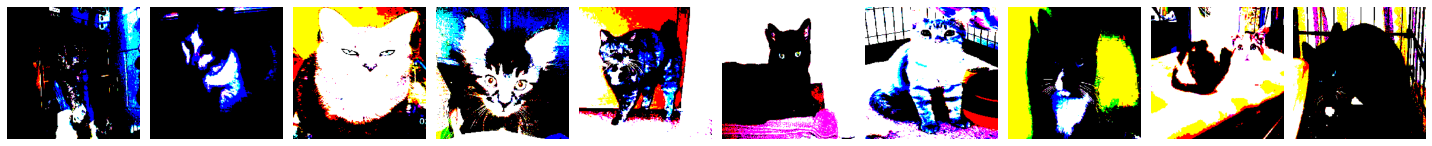

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [ ]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

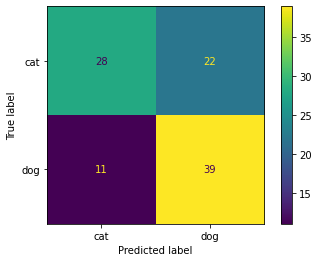

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
cm_plot_labels = ['cat', 'dog']
ConfusionMatrixDisplay.from_predictions(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1), display_labels=cm_plot_labels)